In [43]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings

warnings.filterwarnings('ignore')

In [44]:
df_heart = pd.read_csv('D:\Heart_pre.csv')
df_heart

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393.0,Female,168.0,62.0,110.0,80.0,normal,normal,True,True,False,0
1,1,20228.0,Male,156.0,85.0,140.0,90.0,well above normal,normal,True,True,False,1
2,2,18857.0,Male,165.0,64.0,130.0,70.0,well above normal,normal,True,True,True,1
3,3,17623.0,Female,169.0,82.0,150.0,100.0,normal,normal,True,True,False,1
4,4,17474.0,Male,156.0,56.0,100.0,60.0,normal,normal,True,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,19240.0,Female,168.0,76.0,120.0,80.0,normal,normal,False,True,False,0
69996,69996,22601.0,Male,158.0,126.0,140.0,90.0,above normal,above normal,True,True,False,1
69997,69997,19066.0,Female,183.0,105.0,180.0,90.0,well above normal,normal,True,False,True,1
69998,69998,22431.0,Male,163.0,72.0,135.0,80.0,normal,above normal,True,True,True,1


In [45]:
df_heart.head()

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393.0,Female,168.0,62.0,110.0,80.0,normal,normal,True,True,False,0
1,1,20228.0,Male,156.0,85.0,140.0,90.0,well above normal,normal,True,True,False,1
2,2,18857.0,Male,165.0,64.0,130.0,70.0,well above normal,normal,True,True,True,1
3,3,17623.0,Female,169.0,82.0,150.0,100.0,normal,normal,True,True,False,1
4,4,17474.0,Male,156.0,56.0,100.0,60.0,normal,normal,True,True,True,0


In [46]:
#drop unnamed 
df_heart.drop("Unnamed: 0", axis=1, inplace=True)

df_heart.dropna(inplace = True)
df_heart.shape

(69691, 12)

In [47]:
#Previewing the Data:
df_heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393.0,Female,168.0,62.0,110.0,80.0,normal,normal,True,True,False,0
1,20228.0,Male,156.0,85.0,140.0,90.0,well above normal,normal,True,True,False,1
2,18857.0,Male,165.0,64.0,130.0,70.0,well above normal,normal,True,True,True,1
3,17623.0,Female,169.0,82.0,150.0,100.0,normal,normal,True,True,False,1
4,17474.0,Male,156.0,56.0,100.0,60.0,normal,normal,True,True,True,0


# Numerical EDA

In [48]:
#calculates and returns the total number of missing
df_heart.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [49]:
#Checking the Shape of the Dataset:
df_heart.shape

(69691, 12)

In [50]:
df_heart.dtypes

age            float64
gender          object
height         float64
weight         float64
ap_hi          float64
ap_lo          float64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio           int64
dtype: object

In [51]:
#Descriptive Statistics 
# only for numerical variables
df_heart.describe()

,age,height,weight,ap_hi,ap_lo,cardio
count,69691.000000,69691.00000,69691.000000,69691.000000,69691.000000,69691.000000
mean,19468.919975,164.35864,74.201896,128.822301,96.617382,0.499491
std,2467.247825,8.20892,14.392733,154.347667,188.705362,0.500003
min,10798.000000,55.00000,10.000000,-150.000000,-70.000000,0.000000
25%,17664.500000,159.00000,65.000000,120.000000,80.000000,0.000000
50%,19703.000000,165.00000,72.000000,120.000000,80.000000,0.000000
75%,21327.000000,170.00000,82.000000,140.000000,90.000000,1.000000
max,23713.000000,250.00000,200.000000,16020.000000,11000.000000,1.000000


In [52]:
#calculates and returns the count of distinct (unique) values in each column of the dataframe
df_heart.nunique()

age            8075
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

In [53]:
# Extract the target variable 'cardio' from the DataFrame and convert it to a NumPy array
y = df_heart['cardio'].values

# Display the first 5 values of the target variable
y[:5]

array([0, 1, 1, 1, 0])

In [54]:
# calculate the percentage of each gender 
gender_counts = (df_heart["gender"].value_counts(normalize=True) * 100).round(2)
gender_counts

gender
Male      65.03
Female    34.97
Name: proportion, dtype: float64

In [55]:
# Assuming 'tips' is your DataFrame
# Select only numeric columns
numeric_tips = df_heart.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
correlation_matrix = numeric_tips.corr()
correlation_matrix

,age,height,weight,ap_hi,ap_lo,cardio
age,1.000000,-0.081031,0.053709,0.020724,0.017772,0.238368
height,-0.081031,1.000000,0.290775,0.005488,0.006030,-0.011006
weight,0.053709,0.290775,1.000000,0.030649,0.043591,0.181271
ap_hi,0.020724,0.005488,0.030649,1.000000,0.015984,0.054373
ap_lo,0.017772,0.006030,0.043591,0.015984,1.000000,0.065718
cardio,0.238368,-0.011006,0.181271,0.054373,0.065718,1.000000


# Visualized EDA

<Axes: xlabel='gender', ylabel='age'>

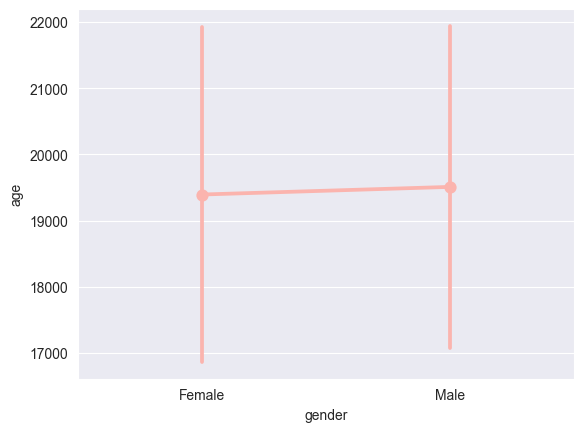

In [56]:
# show standard deviation of observations instead of a confidence interval
sns.pointplot(x='gender', y='age', data=df_heart, ci='sd')

<Axes: xlabel='gender', ylabel='age'>

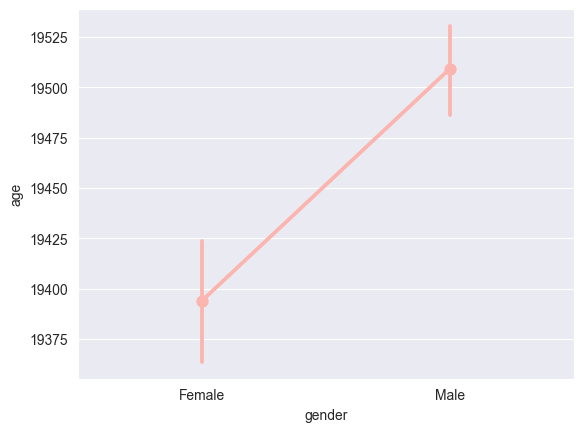

In [57]:
# grouped by a categorical variable
sns.pointplot(x='gender', y='age', data=df_heart)

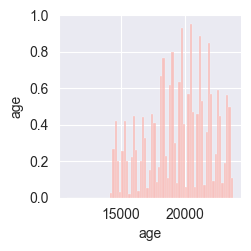

In [58]:
# select wanted variables
sns.pairplot(df_heart[['gender','age']])

<Axes: ylabel='height'>

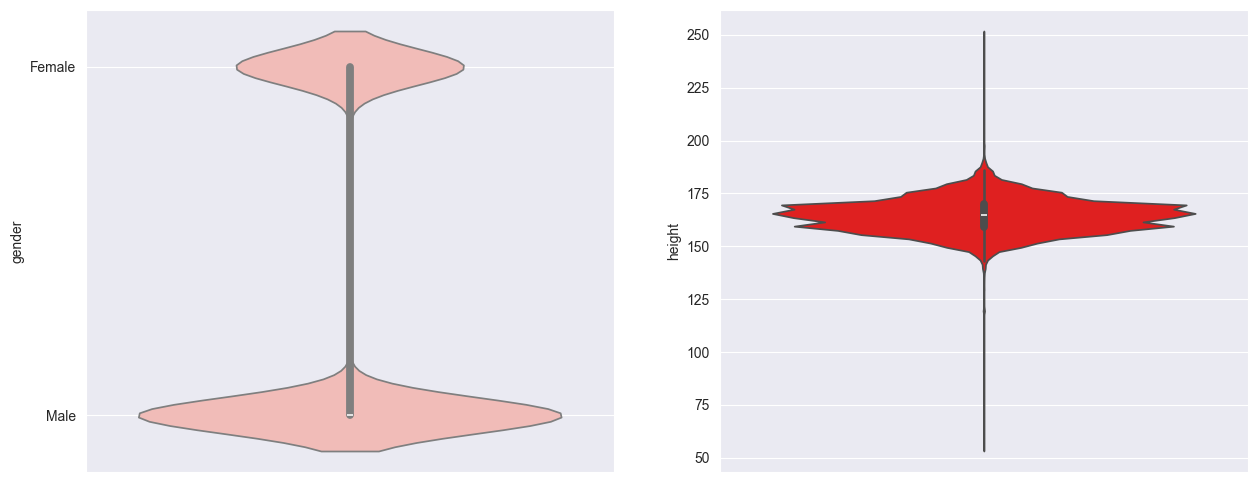

In [59]:
#violin plot
fig, axes = plt.subplots(1, 2, figsize=(15,6)) # plot 2 graphs

# single horizontal violinplot
sns.violinplot(df_heart.gender, ax=axes[0])

# change orientation, set color
sns.violinplot(df_heart.height, orient='v', color='red', ax=axes[1])

Text(0.5, 1.0, 'PDF of Heart')

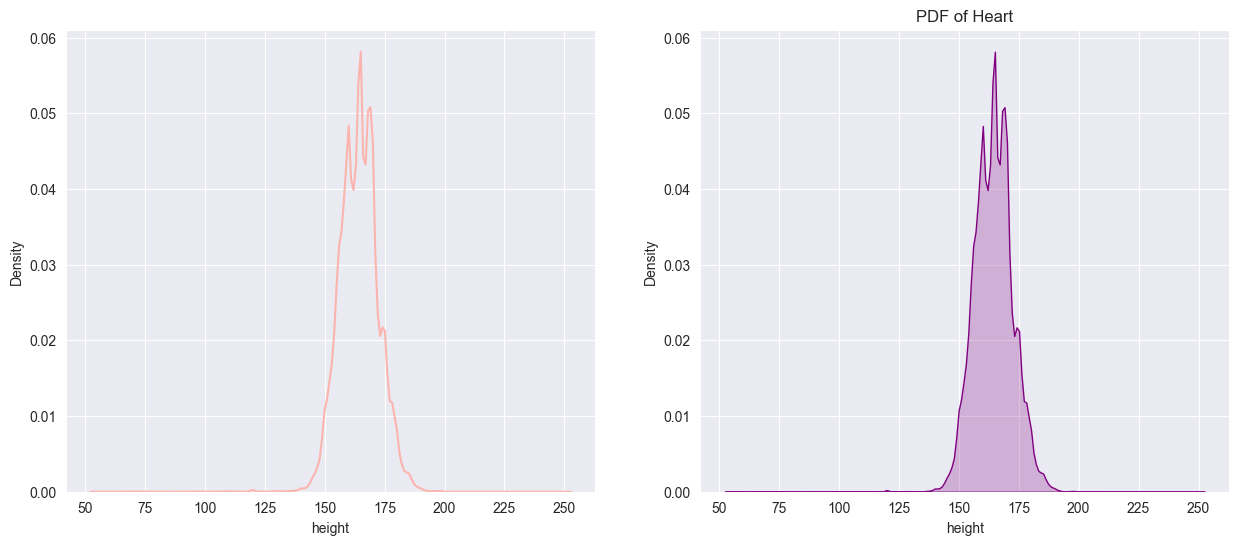

In [60]:
#kde plot
fig, axes = plt.subplots(1, 2, figsize=(15,6)) # plot 2 graphs

# simple density function
sns.kdeplot(df_heart.height, ax=axes[0])

# filled area under the curve, set color, remove legend, set title
sns.kdeplot(df_heart.height, shade=True, color='purple', legend=False, ax=axes[1]).set_title('PDF of Heart')

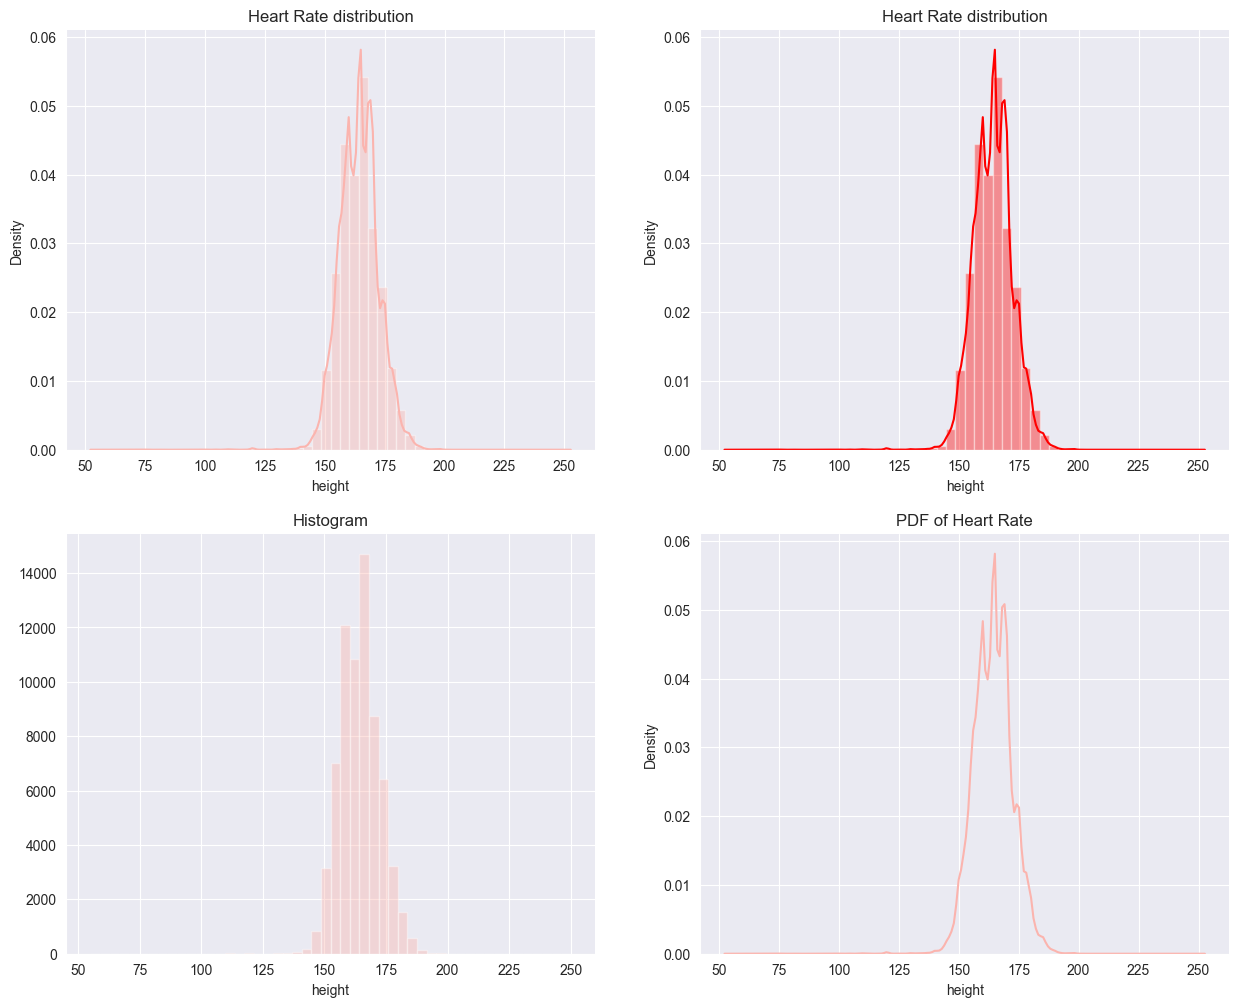

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(15,12)) # plot 4 graphs

# histogram and density function, set title
sns.distplot(df_heart.height, ax=axes[0,0]).set_title('Heart Rate distribution')

#set number of bins and color, set title
sns.distplot(df_heart.height, bins=50, color='r', ax=axes[0,1]).set_title('Heart Rate distribution')

# only histogram, without density function, set title
sns.distplot(df_heart.height, kde=False, ax=axes[1,0]).set_title('Histogram')

# only density function, without histogram, set title
sns.distplot(df_heart.height, hist=False, ax=axes[1,1]).set_title('PDF of Heart Rate')
sns.despine() # no top and right axes spine

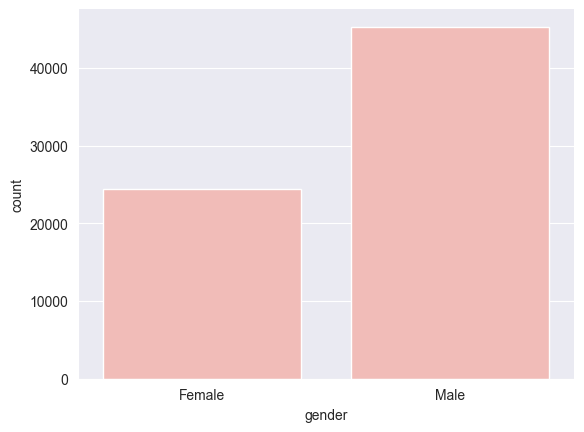

In [62]:

sns.countplot(x='gender', data=df_heart)
sns.despine() # no top and right axes spine


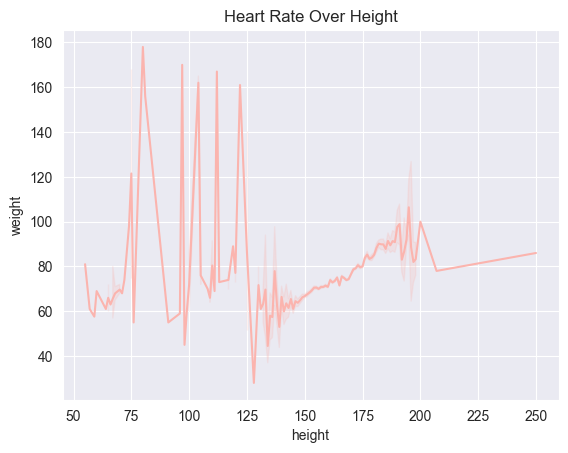

In [63]:
#1-Heart Rate over Height:
sns.lineplot(x='height', y='weight', data=df_heart)
plt.title('Heart Rate Over Height')
plt.show()

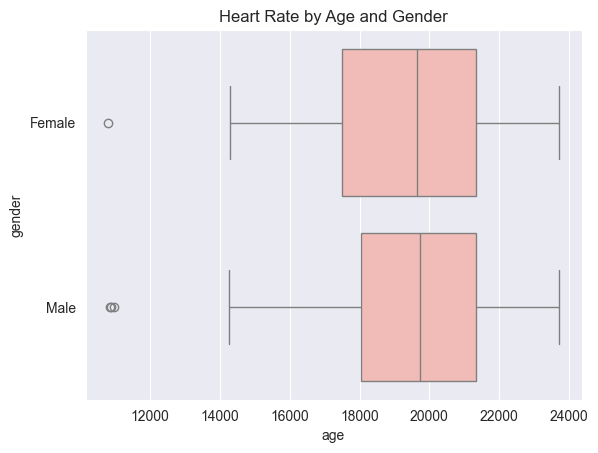

In [64]:
#2-Heart Rate by Age and Gender:
sns.boxplot(x='age', y='gender', data=df_heart)
plt.title('Heart Rate by Age and Gender')
plt.show()

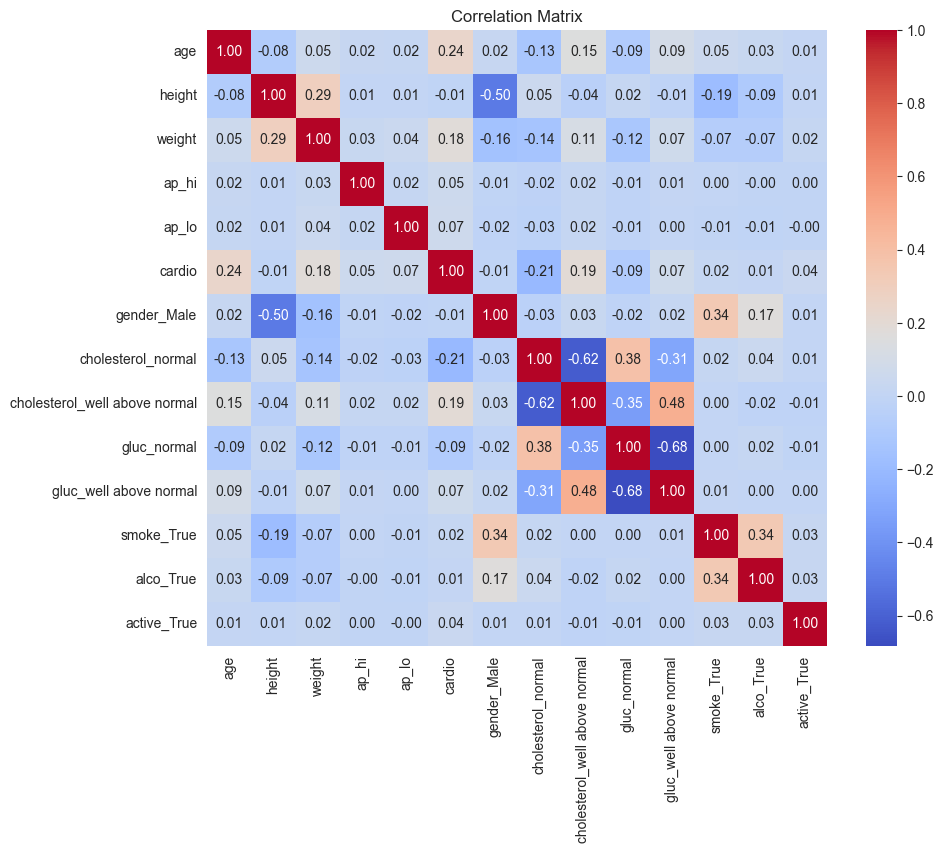

In [65]:
# Convert categorical columns to numeric using one-hot encoding
encoded_df = pd.get_dummies(df_heart, drop_first=True)

# Compute correlation matrix
corr_matrix = encoded_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

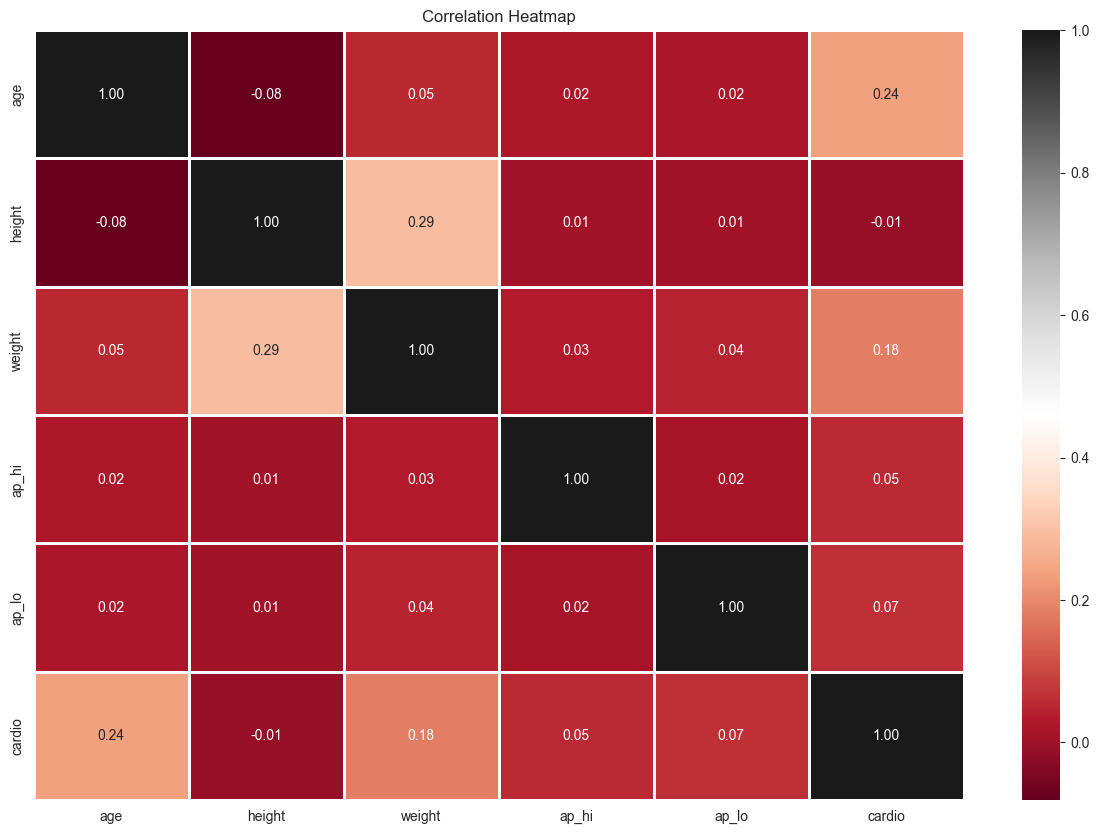

In [66]:
# Set the size of the heatmap figure to 15x10 inches
plt.figure(figsize=(15, 10))

# Create a heatmap
sns.heatmap(df_heart.select_dtypes(include=np.number).corr(), annot=True, fmt='.2f', cmap="RdGy", linewidths=1)

# Add a title to the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

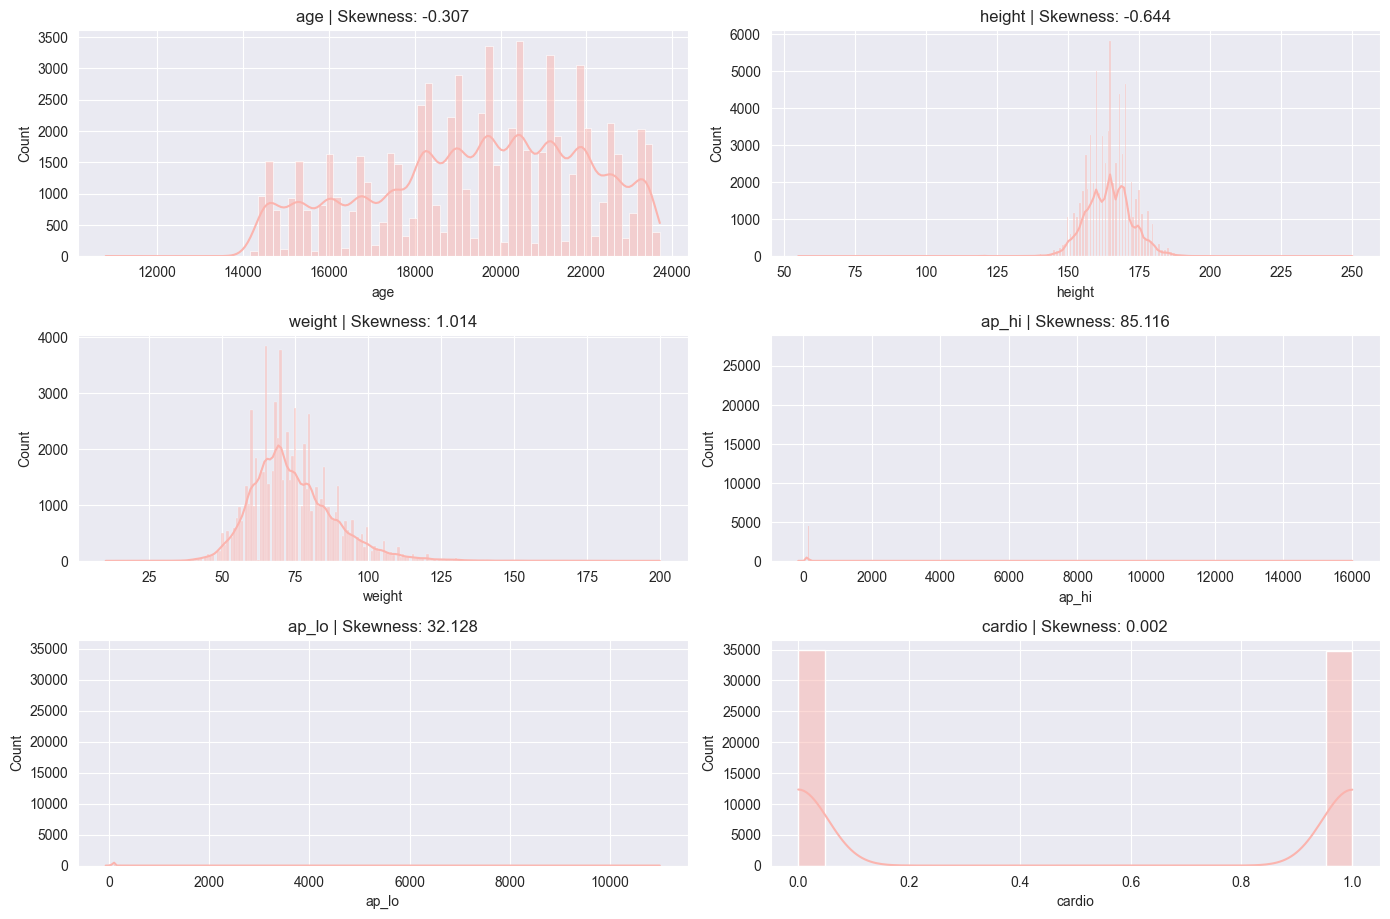

In [67]:
# Assuming you have a DataFrame named 'df_heart'

# Set the style for Seaborn plots to "darkgrid"
sns.set_style("darkgrid")

# Select the numerical columns (int64 and float64 types) from the DataFrame
numerical_columns = df_heart.select_dtypes(include=["int64", "float64"]).columns

# Set the figure size, where the height is determined by the number of numerical columns
# Multiply the number of columns by 3 for better vertical scaling
plt.figure(figsize=(14, len(numerical_columns) * 3))  # Adjust figure size based on number of features

# Loop through each numerical column to create a subplot for each one
for idx, feature in enumerate(numerical_columns, 1):  # 'enumerate' gives the index and column name
    # Create a subplot grid with 2 columns, positioning subplots vertically
    plt.subplot(len(numerical_columns), 2, idx)  
    
    # Plot the histogram with kernel density estimate (KDE) for the current feature
    sns.histplot(df_heart[feature], kde=True)
    
    # Add the title to the plot, including the feature name and its skewness value
    plt.title(f"{feature} | Skewness: {round(df_heart[feature].skew(), 3)}")

# Adjust layout to ensure plots do not overlap
plt.tight_layout()

Text(0.5, 0.98, 'Pair Plot for DataFrame')

<Figure size 1000x600 with 0 Axes>

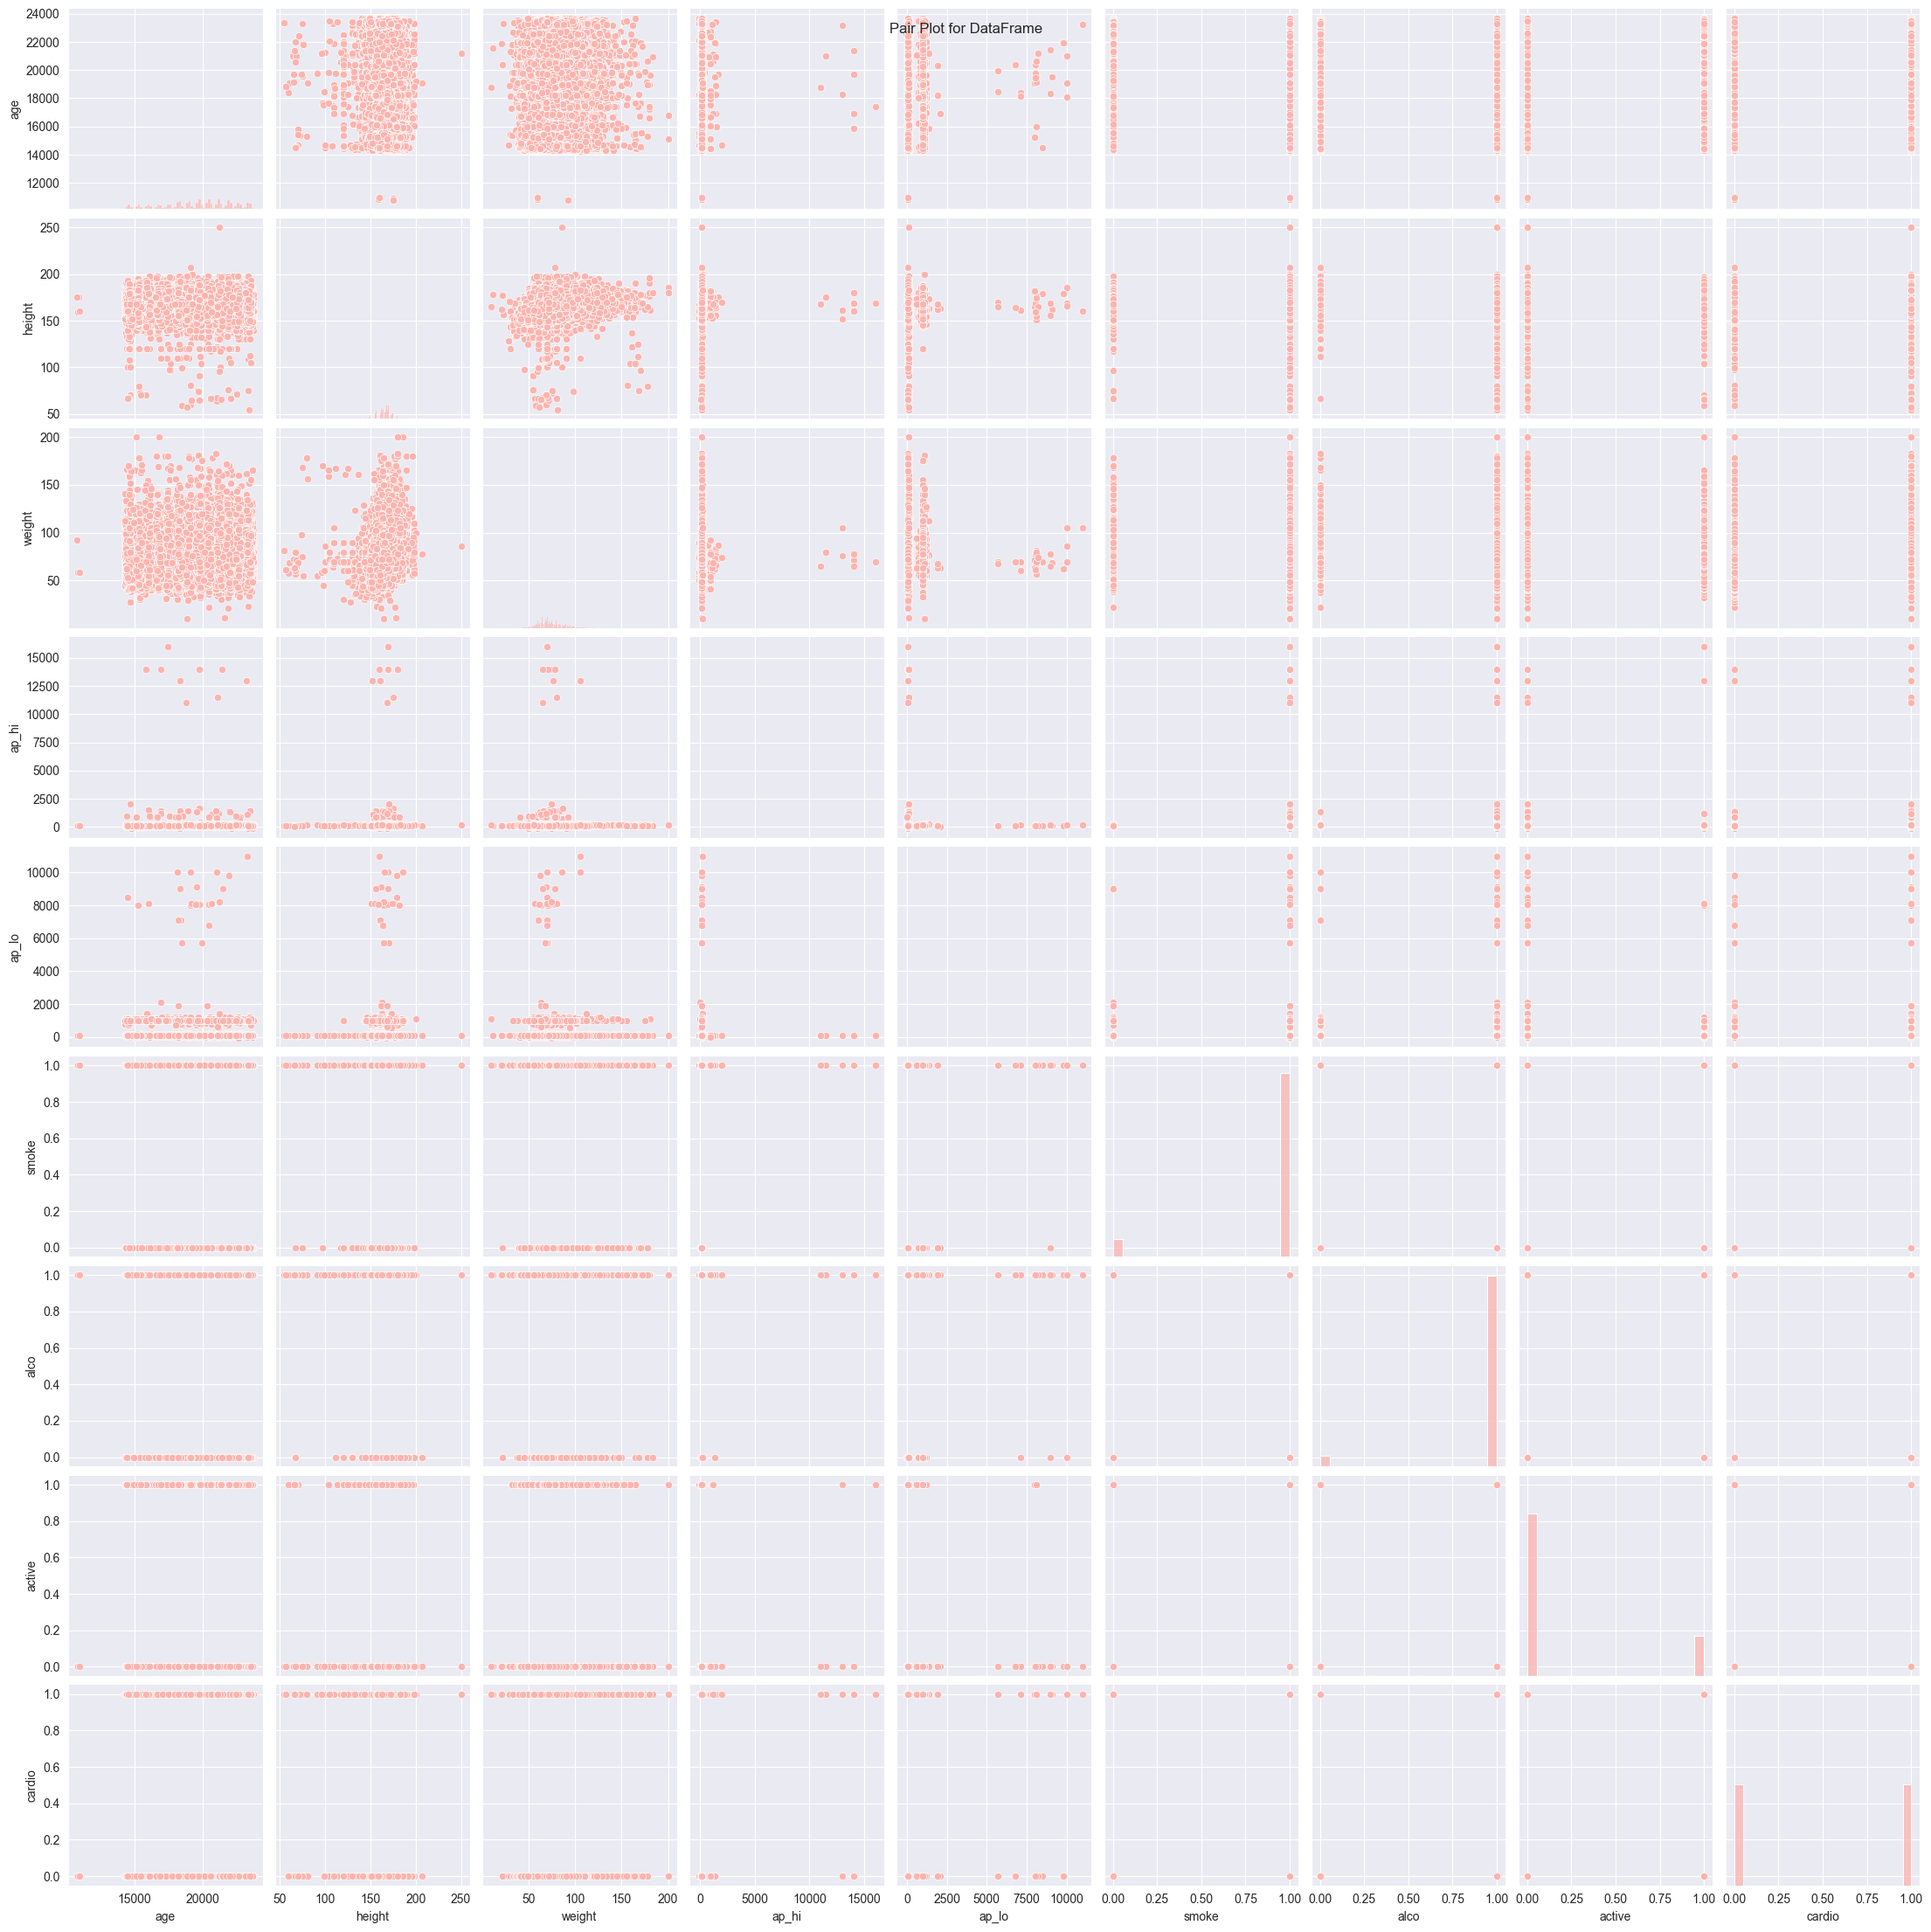

In [68]:
# Set the color palette for the plots to "Pastel1"
sns.set_palette("Pastel1")

# Set the figure size to 10x6 inches
plt.figure(figsize=(10, 6))

# Create a pair plot using Seaborn to visualize pairwise relationships between variables in 'df_heart'
# The pair plot will automatically include all numerical columns and plot scatterplots, histograms, etc.
sns.pairplot(df_heart)

# Add an overall title to the figure (supertitle for the whole grid of plots)
plt.suptitle('Pair Plot for DataFrame')

# Data preprocessing

In [69]:
df_heart['age_in_years'] = (df_heart['age'] / 365)
df_heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
0,18393.0,Female,168.0,62.0,110.0,80.0,normal,normal,True,True,False,0,50.391781
1,20228.0,Male,156.0,85.0,140.0,90.0,well above normal,normal,True,True,False,1,55.419178
2,18857.0,Male,165.0,64.0,130.0,70.0,well above normal,normal,True,True,True,1,51.663014
3,17623.0,Female,169.0,82.0,150.0,100.0,normal,normal,True,True,False,1,48.282192
4,17474.0,Male,156.0,56.0,100.0,60.0,normal,normal,True,True,True,0,47.873973


In [70]:
# Chake if age is covert? 
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69691 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           69691 non-null  float64
 1   gender        69691 non-null  object 
 2   height        69691 non-null  float64
 3   weight        69691 non-null  float64
 4   ap_hi         69691 non-null  float64
 5   ap_lo         69691 non-null  float64
 6   cholesterol   69691 non-null  object 
 7   gluc          69691 non-null  object 
 8   smoke         69691 non-null  object 
 9   alco          69691 non-null  object 
 10  active        69691 non-null  object 
 11  cardio        69691 non-null  int64  
 12  age_in_years  69691 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 7.4+ MB


In [71]:
df_heart['age_in_years'].isnull().sum()

np.int64(0)

In [72]:
# Handel the missing value at the age in years 
df_heart['age_in_years'] = (df_heart['age'].replace([np.inf, -np.inf], np.nan).fillna(0) / 365).astype(int)
df_heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
0,18393.0,Female,168.0,62.0,110.0,80.0,normal,normal,True,True,False,0,50
1,20228.0,Male,156.0,85.0,140.0,90.0,well above normal,normal,True,True,False,1,55
2,18857.0,Male,165.0,64.0,130.0,70.0,well above normal,normal,True,True,True,1,51
3,17623.0,Female,169.0,82.0,150.0,100.0,normal,normal,True,True,False,1,48
4,17474.0,Male,156.0,56.0,100.0,60.0,normal,normal,True,True,True,0,47


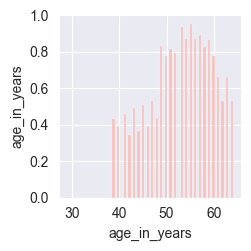

In [73]:
# select wanted variables
sns.pairplot(df_heart[['gender','age_in_years']])

# Modeling the Dataset

In [74]:
# Select specific columns from the DataFrame and convert them to a NumPy array
X = df_heart[['age',      # Age of the patient
              'gender',   # Gender of the patient
              'height',   # Height of the patient in cm
              'weight',   # Weight of the patient in kg
              'ap_hi',    # Systolic blood pressure
              'ap_lo',    # Diastolic blood pressure
              'cholesterol', # Cholesterol level (1: normal, 2: above normal, 3: well above normal)
              'gluc',     # Glucose level (1: normal, 2: above normal, 3: well above normal)
              'smoke',    # Smoking status (0: non-smoker, 1: smoker)
              'alco',     # Alcohol consumption (0: non-drinker, 1: drinker)
              'active']   # Physical activity (0: inactive, 1: active)
             ].values


# Display the first 5 rows of the array
X[:5, :]

# Extract the target variable 'cardio' from the DataFrame and convert it to a NumPy array
Y = df_heart['cardio'].values

# Display the first 5 values of the target variable
Y[:5]

array([0, 1, 1, 1, 0])

In [75]:
# Create an array of indices ranging from 0 to the number of samples in y
indices = np.arange(Y.shape[0])

# Display the array of indices
indices
# Initialize a random number generator with a fixed seed for reproducibility
rnd = np.random.RandomState(123)

# Shuffle the array of indices using the random number generator
shuffled_indices = rnd.permutation(indices)

# Display the shuffled indices
shuffled_indices

array([33458,  5253,  8942, ..., 17730, 28030, 15725])

In [76]:
# Reorder the features (X) and target variable (y) according to the shuffled indices
X_shuffled = X[shuffled_indices]  # Shuffled features
y_shuffled = Y[shuffled_indices]  # Shuffled target variable

# Display the shuffled feature and target arrays
X_shuffled, y_shuffled

(array([[20427.0, 'Male', 165.0, ..., True, True, False],
        [19770.0, 'Female', 170.0, ..., True, True, True],
        [19892.0, 'Female', 165.0, ..., True, True, False],
        ...,
        [21116.0, 'Male', 154.0, ..., True, True, False],
        [19700.0, 'Female', 175.0, ..., True, True, False],
        [20373.0, 'Male', 156.0, ..., True, True, False]], dtype=object),
 array([1, 0, 1, ..., 1, 1, 0]))

In [77]:
# Split the shuffled data into training and testing sets
X_train = X_shuffled[:60000]  # First 1000 samples for training features
y_train = y_shuffled[:1000]  # First 1000 samples for training target variable

X_test = X_shuffled[60000:]   # Remaining samples for testing features
y_test = y_shuffled[1000:]   # Remaining samples for testing target variable

# Display the split training and testing datasets
X_train, y_train, X_test, y_test

(array([[20427.0, 'Male', 165.0, ..., True, True, False],
        [19770.0, 'Female', 170.0, ..., True, True, True],
        [19892.0, 'Female', 165.0, ..., True, True, False],
        ...,
        [19056.0, 'Female', 160.0, ..., False, True, True],
        [18202.0, 'Male', 154.0, ..., True, True, False],
        [21964.0, 'Female', 175.0, ..., True, True, False]], dtype=object),
 array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1

In [78]:
# Load the Iris dataset
iris = load_iris()

# Extract feature columns (sepal width and petal length) and target labels
X, y = iris.data[:, 2:], iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # Features and target variable
    test_size=0.3,     # Proportion of data to be used for testing (30%)
    random_state=123,  # Seed for reproducibility
    shuffle=True       # Shuffle data before splitting
)


In [79]:
columns_to_lowercase = ['gender', 'cholesterol', 'gluc']  # Specify the columns you want to lowercase
df_heart[columns_to_lowercase] = df_heart[columns_to_lowercase].apply(lambda x: x.str.lower())

## Logistic Regression


Best Hyperparameters for Logistic Regression: {'C': np.float64(10.0), 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy of Logistic Regression model: 95.56%

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



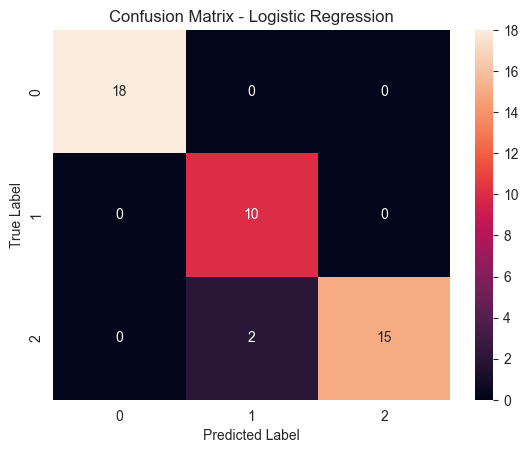

In [80]:
# Define the parameter grid for Logistic Regression
logreg_param_grid = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 3, 7),
    "solver": ["liblinear"],
}

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Perform grid search with cross-validation
logreg_grid_search = GridSearchCV(
    logreg_model, logreg_param_grid, cv=5, scoring="accuracy"
)
logreg_grid_search.fit(X_train, y_train)

# Get the best parameters
best_logreg_params = logreg_grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_logreg_params)

# Train a Logistic Regression model with the best parameters
best_logreg_model = LogisticRegression(random_state=42, **best_logreg_params)
best_logreg_model.fit(X_train, y_train)

# Make predictions on the test set
logreg_predict = best_logreg_model.predict(X_test)

# Calculate accuracy on the test set
best_logreg_acc = accuracy_score(y_test, logreg_predict)
print(
    "Best Accuracy of Logistic Regression model:",
    "{:.2f}%".format(best_logreg_acc * 100),
)

# Display classification report
print("\nClassification Report - Logistic Regression:")
lr_cr = classification_report(y_test, logreg_predict)
print(lr_cr)

# Display confusion matrix
logreg_cm = confusion_matrix(y_test, logreg_predict)

# Plot the confusion matrix
sns.heatmap(logreg_cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Decision Tree

Best Hyperparameters: {'criterion': 'gini', 'max_depth': np.int64(4), 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy of Decision Tree with Best Parameters: 93.33%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



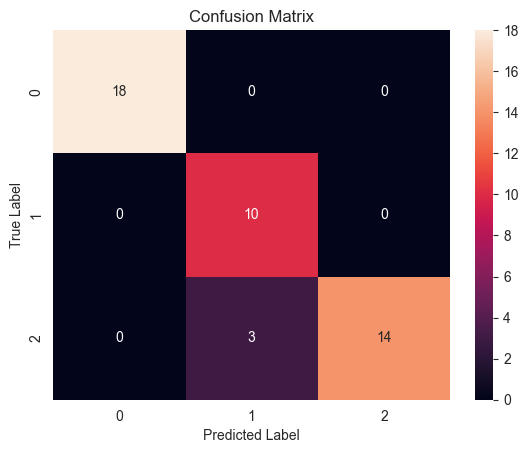

In [81]:
# Define the parameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(1, 21),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
}

# Create a Decision Tree model
DT = DecisionTreeClassifier(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a Decision Tree with the best parameters
best_DT = DecisionTreeClassifier(random_state=0, **best_params)
best_DT.fit(X_train, y_train)

# Make predictions on the test set
DT_predict = best_DT.predict(X_test)

# Calculate accuracy on the test set
max_dt_acc = accuracy_score(y_test, DT_predict)
print(
    "Accuracy of Decision Tree with Best Parameters:",
    "{:.2f}%".format(max_dt_acc * 100),
)

# Display classification report
print("\nClassification Report:")
dt_cr = classification_report(y_test, DT_predict)
print(dt_cr)

# Display confusion matrix
DT_cm = confusion_matrix(y_test, DT_predict)

# Plot the confusion matrix
sns.heatmap(DT_cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## K_NN
K-nearest neighbors (KNN) is a supervised machine learning algorithm that is used for both classification and regression tasks

->In classification tasks, KNN is used to predict the category or label of a new data point based on its similarity to the k nearest neighbors.

->In regression tasks, KNN is used to predict a continuous numerical value for a new data point.

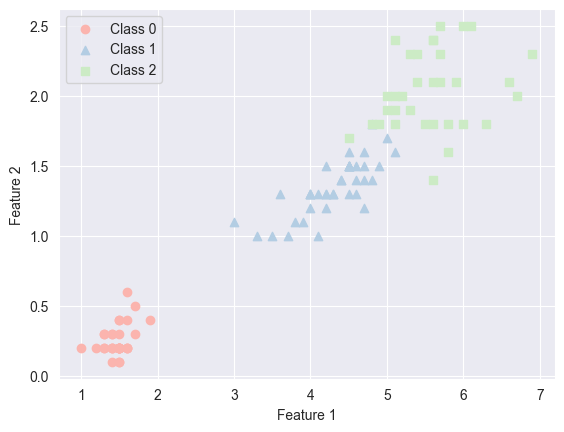

In [82]:
# Scatter plot for each class in the training data

# Plot class 0 with circular markers
plt.scatter(X_train[y_train == 0, 0],  # X-coordinates for class 0
            X_train[y_train == 0, 1],  # Y-coordinates for class 0
            marker='o',                # Marker style for class 0
            label='Class 0')           # Label for legend

# Plot class 1 with triangular markers
plt.scatter(X_train[y_train == 1, 0],  # X-coordinates for class 1
            X_train[y_train == 1, 1],  # Y-coordinates for class 1
            marker='^',                # Marker style for class 1
            label='Class 1')           # Label for legend

# Plot class 2 with square markers
plt.scatter(X_train[y_train == 2, 0],  # X-coordinates for class 2
            X_train[y_train == 2, 1],  # Y-coordinates for class 2
            marker='s',                # Marker style for class 2
            label='Class 2')           # Label for legend

# Label the x-axis
plt.xlabel('Feature 1')

# Label the y-axis
plt.ylabel('Feature 2')

# Add a legend in the upper left corner
plt.legend(loc='upper left')

# Display the plot
plt.show()


In [83]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier with 10 neighbors
knn_model = KNeighborsClassifier(n_neighbors=10)

# Fit the K-Nearest Neighbors model to the training data
knn_model.fit(X_train, y_train)

# The model is now trained and can be used for predictions


KNeighborsClassifier(n_neighbors=10)

In [84]:
# Use the trained K-Nearest Neighbors model to make predictions on the test data
y_pred = knn_model.predict(X_test)

# y_pred now contains the predicted labels for the test set


In [85]:
# Calculate the number of correct predictions by comparing predicted labels to true labels
num_correct_predictions = (y_pred == y_test).sum()

# Compute the accuracy as a percentage of correct predictions over the total number of test samples
accuracy = (num_correct_predictions / y_test.shape[0]) * 100

# Print the accuracy of the model on the test set, formatted to two decimal places
print('Test set accuracy: %.2f%%' % accuracy)


Test set accuracy: 95.56%


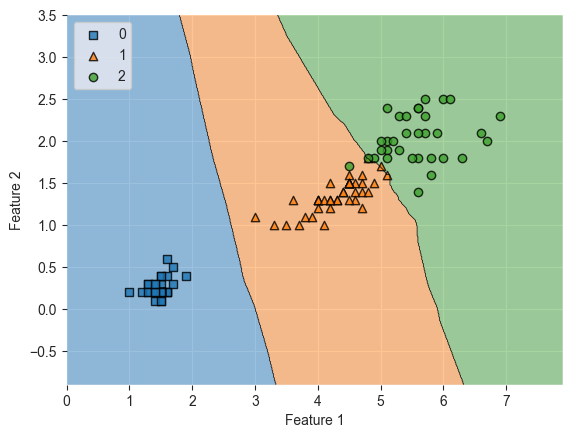

In [86]:
from mlxtend.plotting import plot_decision_regions

# Plot the decision regions of the K-Nearest Neighbors model on the training data
plot_decision_regions(X_train,        # Features of the training set
                      y_train,        # Target variable of the training set
                      knn_model)      # Trained K-Nearest Neighbors model

# Label the x-axis
plt.xlabel('Feature 1')

# Label the y-axis
plt.ylabel('Feature 2')

# Add a legend in the upper left corner
plt.legend(loc='upper left')


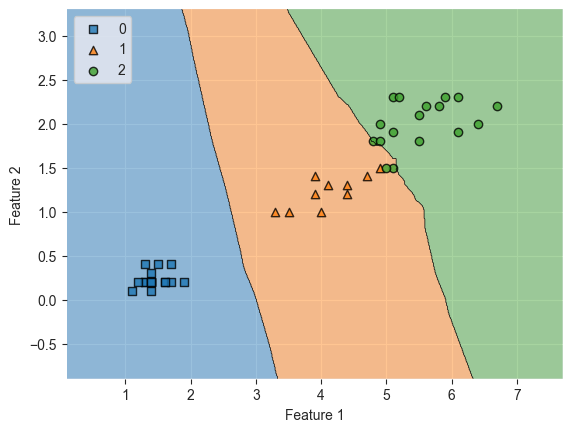

In [87]:
from mlxtend.plotting import plot_decision_regions

# Plot the decision regions of the K-Nearest Neighbors model on the test data
plot_decision_regions(X_test,        # Features of the test set
                      y_test,        # Target variable of the test set
                      knn_model)      # Trained K-Nearest Neighbors model

# Label the x-axis
plt.xlabel('Feature 1')

# Label the y-axis
plt.ylabel('Feature 2')

# Add a legend in the upper left corner
plt.legend(loc='upper left')

## Support Vector Machine
Support Vector Machine
SVM is a supervised machine learning algorithm primarily used for classification tasks

->It works by finding

a hyperplane in high-dimensional space that separates data points into two classes. The goal is to find the hyperplane that maximizes the margin between the two classes

SVM - with normalization
Test accuracy: 92.60%


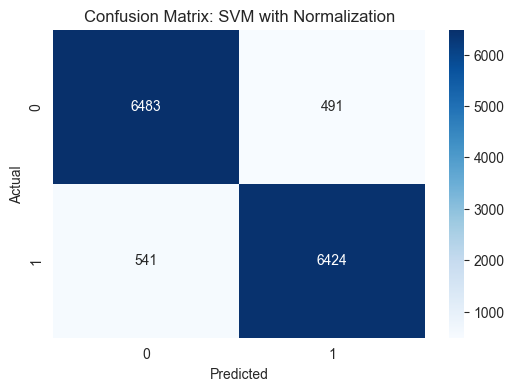

In [88]:
from sklearn.model_selection import train_test_split

# Prepare feature matrix (X) and target vector (y)
X = df_heart.drop('age', axis=1)  # Drop the 'age' column from features
y = df_heart['cardio']             # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode categorical columns in the training data
X_train = X_train.copy()  # Create a copy to avoid modifying the original data
for col in ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']:  # List of categorical columns
    X_train[col] = le.fit_transform(X_train[col])  # Apply LabelEncoder to each column

# Encode categorical columns in the test data
X_test = X_test.copy()  # Create a copy to avoid modifying the original data
for col in ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']:  # List of categorical columns
    X_test[col] = le.fit_transform(X_test[col])  # Apply LabelEncoder to each column

from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer  # Import the SimpleImputer for handling missing values

# Create an imputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test)

# Normalize the imputed training and test data
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train_imputed)  # Fit and transform training data
X_test_normalized = normalizer.transform(X_test_imputed)  # Transform test data

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train a Support Vector Classifier (SVC) on the normalized data
svm_clf_normalized = SVC(random_state=42)
svm_clf_normalized.fit(X_train_normalized, y_train)

# Predict the target variable for the test data
y_pred_test_svm_normalized = svm_clf_normalized.predict(X_test_normalized)

# Calculate the accuracy of the model on the test data
accuracy_test_svm_normalized = accuracy_score(y_test, y_pred_test_svm_normalized)

# Print the accuracy of the SVM model with normalization
print("SVM - with normalization")
print(f"Test accuracy: {accuracy_test_svm_normalized * 100:.2f}%")

# Generate the confusion matrix
svm_confusion_matrix = confusion_matrix(y_test, y_pred_test_svm_normalized)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Add titles and labels
plt.title("Confusion Matrix: SVM with Normalization")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()